In [1]:
import torch

## 2.1 数据操作

### 入门

In [ ]:
x = torch.arange(12)  # 除非额外指定，新的张量将存储在内存中，并采用基于CPU的计算。
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
x.shape  # 张量的shape属性，沿每个轴的形状

torch.Size([12])

In [ ]:
x.numel()  # 元素的个数总数

12

In [7]:
y = torch.tensor([[1, 2], [3, 4]])

In [8]:
y.shape

torch.Size([2, 2])

In [9]:
y.numel()

4

In [10]:
y.size()

torch.Size([2, 2])

In [ ]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [13]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [14]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [15]:
torch.randn(3, 4)  # 均值为0，标准差为1的正态分布中随机采样

tensor([[-0.5844, -0.5255,  0.5104, -1.6040],
        [-0.1062, -0.1400, -1.6475,  1.4156],
        [-0.8143,  0.8501,  0.1043, -1.7555]])

### 运算符

In [16]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [17]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [19]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X, Y

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]))

In [20]:
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [21]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [22]:
X.sum()

tensor(66.)

### 广播

In [23]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [24]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 索引和切片

In [26]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [28]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [29]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 节省内存
Y[:] = X + Y / Y += X

(no) Y = X + Y

In [ ]:
before = id(Y)
Y = Y + X  # 为 Y + X 的结果分配新的内存，Y指向内存中的新位置【不推荐】
id(Y) == before 

False

In [33]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y  # 原地操作
print('id(Z):', id(Z))


id(Z): 1794988329456
id(Z): 1794988329456


In [ ]:
before = id(X)
X += Y  # 这样也不会分配新的内存
id(X) == before

True

## 2.2 数据预处理（pandas）

In [39]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open (data_file, 'w') as f:
    """
    1. with是 Python 中的上下文管理器，用于简化资源的管理，比如文件操作。
        它会在代码块执行完毕后自动关闭文件，无需手动调用 close() 方法。
    2. 'w'模式表示以写入模式打开文件。
        如果文件不存在，会创建一个新文件；如果文件已存在，会清空文件内容。
    """
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)  # 返回一个DataFrame
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [ ]:
# 处理缺失值：插值法
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.select_dtypes(include='number').mean()) 
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [48]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


In [50]:
# 转化张量格式（目前inputs和outputs中的所有条目都是数值形式）
print(data.dtypes)

NumRooms    float64
Alley        object
Price         int64
dtype: object


In [ ]:
import torch
X = torch.tensor(inputs.to_numpy(dtype=float))  # dataframe先转到numpy，再转到tensor
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 线性代数

In [52]:
# 标量
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y


(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [56]:
# 向量
x = torch.arange(4)
x, x[3]

(tensor([0, 1, 2, 3]), tensor(3))

In [57]:
x.dtype, x[3].dtype

(torch.int64, torch.int64)

In [59]:
len(x)

4

In [60]:
x.shape

torch.Size([4])

In [62]:
x.size()

torch.Size([4])

In [63]:
# 矩阵
A = torch.arange(20).reshape((5, 4))
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [64]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [68]:
A.dtype

torch.int64

In [69]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [70]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [72]:
# 张量
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [73]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [74]:
# 按元素乘法
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [75]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [77]:
# 降维
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [78]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [79]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
A_sum_axis0 = A.sum(axis=0)  # 0是行
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [81]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [82]:
A.sum(axis=[0, 1])

tensor(190.)

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [84]:
A.numel()

20

In [88]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [87]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [89]:
# 非降维求和
sum_A = A.sum(axis=1, keepdim=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [90]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [92]:
A.cumsum(axis=0)  # 沿轴0（行）计算累积总和

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [93]:
# 点积
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [94]:
# 也可以用按元素乘法 + 求和来表示两个向量的点积
torch.sum(x * y)

tensor(6.)

In [95]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [96]:
x

tensor([0., 1., 2., 3.])

In [ ]:
# 矩阵-向量积
torch.mv(A, x)  # （5，4）mv (1, 4) -> (1, 5)

tensor([ 14.,  38.,  62.,  86., 110.])

In [ ]:
# 矩阵-矩阵乘法
B = torch.ones(4, 3)
torch.mm(A, B)  # (5, 4) mm (4, 3) -> (5, 3)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [ ]:
# 范数【非正式地说，向量的范数是表示一个向量有多大】
u = torch.tensor([3.0, -4.0])
torch.norm(u)  # L2范数（向量）

tensor(5.)

In [ ]:
torch.abs(u).sum()  # L1范数

tensor(7.)

In [ ]:
# 矩阵的Frobenius范数（矩阵中的“L2范数”）：矩阵元素平方和的平方根
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 2.4 微积分

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline # backend_inline 是 Matplotlib 的一个后端，专为 Jupyter Notebook 优化
# 它使图形以静态图片形式嵌入 Notebook 输出
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [104]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [105]:
def use_svg_display():
    """使用svg格式（矢量图）在jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [106]:
def set_figsize(figsize=(3.5, 2.5)):  # 默认宽3.5，高2.5
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize  # 通过修改 Matplotlib 的配置参数 rcParams，设置默认的图表尺寸

In [107]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()  # 显示网格线

In [110]:
# 定义一个plot函数来简洁地绘制多条曲线
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend=[]
    
    set_figsize(figsize)  # svg + 设置figsize
    axes = axes if axes else d2l.plt.gca()  # get current axes 获取当前坐标轴对象（Axes），
    # 如果当前没有活动的坐标轴，gca()会自动创建一个新的坐标轴

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        """检查输入的X是否是一维的（ndim通常是numpy数组或类似对象的属性，表示维度数）"""
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))  # 如果没有__len__属性，说明列表中元素是“不可迭代的”，也可视作一维（比如不可以是嵌套列表）
    
    if has_one_axis(X):  # 如果X是一维数据，将其转换为二维列表（为了后面zip不报错）
        X = [X]  # if X = [1, 2, 3] -> X = [[1, 2, 3]]

    if Y is None:
        # 说明用户只提供了Y数据，被X读进去了（这种情况下后续绘图函数会自动生成横坐标）
        X, Y = [[]] * len(X), X  # 将Y正确读入
    elif has_one_axis(Y):
        Y = [Y]
    
    if len(X) != len(Y):
        X = X * len(Y)

    axes.cla()

    for x, y, fmts in zip(X, Y, fmts):
        if len(x):  # 如果给了x
            axes.plot(x, y, fmts)
        else:  # 如果只给了y，会自动生成横坐标
            axes.plot(y, fmts) 
    
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


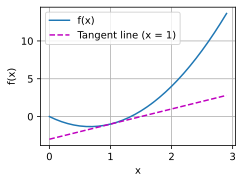

In [112]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x = 1)'])

## 2.5 自动微分

In [113]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [114]:
x.requires_grad_(True)  # 等价于 x = torch.arange(4.0, requires_grad=True)
x.grad  # 默认值是None

In [122]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [123]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [124]:
x.grad == 4 * x

tensor([True, True, True, True])

In [ ]:
# 默认情况下，PyTorch会累计梯度
y = x.sum()
y.backward()
x.grad

tensor([ 1.,  5.,  9., 13.])

In [126]:
x.grad.zero_()  # 梯度清零
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [128]:
# 非标量变量的反向传播
x.grad.zero_()
y = x * x
y

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [ ]:
y.backward(torch.ones(len(x)))  # 希望y的元素对x的梯度分别乘以这个权重【？这个权重的意义是什么】
# 等价于 y.sum.backward()
x.grad

tensor([0., 2., 4., 6.])

In [130]:
# 分离计算
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [131]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [132]:
# 即使计算图需要通过Python 控制流（条件、循环或任意函数调用），自动微分仍然可以得到正确的梯度
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a


tensor(True)

## 2.6 概率

In [134]:
%matplotlib inline
import torch 
from torch.distributions import multinomial  # 多项分布
from d2l import torch as d2l

In [135]:
fair_probs = torch.ones([6]) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [137]:
multinomial.Multinomial(1, fair_probs).sample()  # 掷一次骰子
# 输出第i个位置，是采样结果中i出现的次数

tensor([0., 0., 0., 0., 1., 0.])

In [138]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([4., 0., 1., 2., 2., 1.])

In [141]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1550, 0.1530, 0.1670, 0.1770, 0.1770, 0.1710])

In [142]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))  # 进行500组实验，每组抽取10个样本
counts

tensor([[2., 3., 2., 1., 1., 1.],
        [3., 1., 0., 2., 2., 2.],
        [1., 0., 3., 3., 3., 0.],
        ...,
        [1., 1., 4., 2., 1., 1.],
        [3., 2., 1., 3., 0., 1.],
        [0., 1., 4., 2., 2., 1.]])

In [143]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  2.,   3.,   2.,   1.,   1.,   1.],
        [  5.,   4.,   2.,   3.,   3.,   3.],
        [  6.,   4.,   5.,   6.,   6.,   3.],
        ...,
        [812., 812., 835., 822., 817., 882.],
        [815., 814., 836., 825., 817., 883.],
        [815., 815., 840., 827., 819., 884.]])

In [144]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
estimates

tensor([[0.2000, 0.3000, 0.2000, 0.1000, 0.1000, 0.1000],
        [0.2500, 0.2000, 0.1000, 0.1500, 0.1500, 0.1500],
        [0.2000, 0.1333, 0.1667, 0.2000, 0.2000, 0.1000],
        ...,
        [0.1631, 0.1631, 0.1677, 0.1651, 0.1641, 0.1771],
        [0.1633, 0.1631, 0.1675, 0.1653, 0.1637, 0.1770],
        [0.1630, 0.1630, 0.1680, 0.1654, 0.1638, 0.1768]])

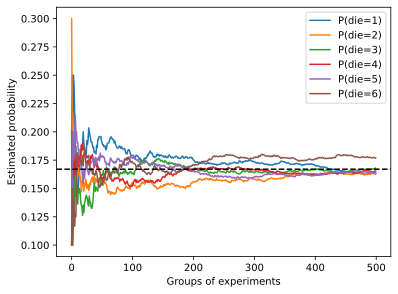

In [145]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=f"P(die={str(i + 1)})")

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel("Groups of experiments")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()  # 显示图例


## 2.7 查阅文档

In [ ]:
print(dir(torch.distributions))  # 模块中可以调用哪些函数和类

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'InverseGamma', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'Transform

In [148]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, us

In [149]:
torch.ones(4)

tensor([1., 1., 1., 1.])